In [2]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

mapping_dict = np.load("dataset/mapping_fileB1 B2.npy", allow_pickle=True).item()
print(mapping_dict)
feature_data = []  # Feature list
label_list = []    # Firmness list
plot_oi=[]

keys = list(mapping_dict.keys())
print(f"Keys from mapping_dict: {keys[:5]}")  # Debug: Print first 5 keys

label_list=list(mapping_dict.values())
print(label_list)


{'RS20240205125747_P19100983.xlsx': 32.2687, 'RS20240205125849_P19100983.xlsx': 32.2687, 'RS20240205130001_P19100983.xlsx': 32.2687, 'RS20240205130054_P19100983.xlsx': 32.2687, 'RS20240205130211_P19100983.xlsx': 32.2687, 'RS20240205130308_P19100983.xlsx': 32.2687, 'RS20240205130405_P19100983.xlsx': 32.2687, 'RS20240205130458_P19100983.xlsx': 32.2687, 'RS20240205130603_P19100983.xlsx': 32.2687, 'RS20240205130708_P19100983.xlsx': 32.2687, 'RS20240205130805_P19100983.xlsx': 32.2687, 'RS20240205130910_P19100983.xlsx': 32.2687, 'RS20240205131007_P19100983.xlsx': 32.2687, 'RS20240205131102_P19100983.xlsx': 32.2687, 'RS20240205131155_P19100983.xlsx': 32.2687, 'RS20240205131248_P19100983.xlsx': 32.2687, 'RS20240205131338_P19100983.xlsx': 32.2687, 'RS20240205131439_P19100983.xlsx': 32.2687, 'RS20240205131541_P19100983.xlsx': 32.2687, 'RS20240205131639_P19100983.xlsx': 32.2687, 'RS20240205131820_P19100983.xlsx': 39.0408, 'RS20240205131914_P19100983.xlsx': 39.0408, 'RS20240205132004_P19100983.xls

In [4]:
csv_dir = "dataset/data/B1 B2xlsx/"
if not os.path.exists(csv_dir):
    raise FileNotFoundError(f"Directory {csv_dir} does not exist.")
z=0
for filename in os.listdir(csv_dir):
    file_key = os.path.splitext(filename)[0]
    if file_key + ".xlsx" in keys:  # Ensure extension matches keys
        file_path = os.path.join(csv_dir, filename)
        #print(file_path)
        df = pd.read_excel(file_path,header=None)  # Use read_excel for .xlsx files
        features = df.iloc[:, 2].values  # Ensure column index is correct
        # features variable has all the values of the 3rd column i.e y
        #z+=1
        plot_ing = df.iloc[:,1]
        #print(len(features),z)#prints 512 2773 times
        feature_data.append(features)
        plot_oi.append(plot_ing)
        #print(feature_data[0])
        #feature data is an arrray where every element is the features i.e the 3rd row of every file
columns = [f"Column {i+1}" for i in range(512)]
df_x = pd.DataFrame(feature_data, columns=columns)
df_plot = pd.DataFrame(plot_oi)
#print(df_x.head())#prints [5 rows x 512 columns] values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


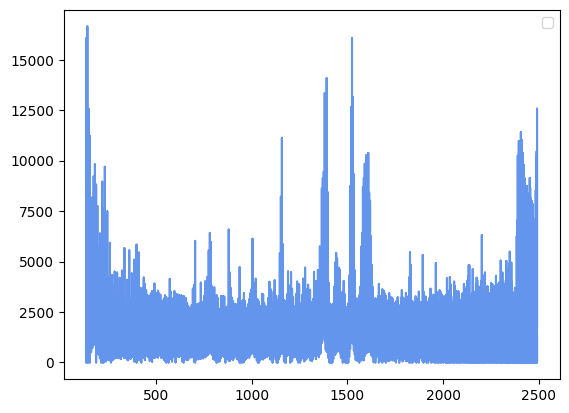

In [5]:
plt.plot(df_plot, df_x, color='cornflowerblue') 
plt.legend() 
plt.show() 

In [6]:
df_y = pd.DataFrame(label_list, columns=['Firmness'])
#print(df_y.head()) 2773
#print(len(df_y))#prints

In [7]:
print(df_x.head())


    Column 1  Column 2  Column 3   Column 4   Column 5   Column 6   Column 7  \
0  1841.7994  764.2142  848.6290  1089.0439  1363.4587  1909.8735  2164.2883   
1   771.9731  280.4083   17.8450   415.2802  1047.7152  1472.1521  1548.5872   
2  1189.4631  391.0244  443.5874   698.8986  1058.7097  1618.2710  1750.8341   
3  1180.8571  637.4937  631.8784   859.7651  1155.4017  1394.0364  1578.6729   
4  1400.7631  543.1995  814.8840  1059.3203  1360.5067  1780.9431  1860.3776   

    Column 8   Column 9  Column 10  ...  Column 503  Column 504  Column 505  \
0  2214.7034  1943.1179  1464.5331  ...   1011.1140   1289.8132   1422.4519   
1  1297.0222  1305.4591  1138.8940  ...    756.1838    859.4036    965.3743   
2  1915.3953  1531.9564  1567.5195  ...    432.1934    465.9976    625.9282   
3  1644.3096  1372.9463  1443.5809  ...    952.2764    640.3389   1156.4014   
4  2057.8140  1916.2504  1618.6848  ...   2209.3872   2051.6191   1557.2886   

   Column 506  Column 507  Column 508  Colum

In [7]:
print(df_y.head())

   Firmness
0   32.2687
1   32.2687
2   32.2687
3   32.2687
4   32.2687


In [17]:
#Normalisation 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_x)   
normalized_df = pd.DataFrame(normalized_data, columns=df_x.columns, index=df_x.index)                                                                                                        

In [19]:
normalized_df.head()

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,...,Column 503,Column 504,Column 505,Column 506,Column 507,Column 508,Column 509,Column 510,Column 511,Column 512
0,0.114664,0.045902,0.067549,0.096974,0.132031,0.157797,0.155032,0.147072,0.220506,0.138167,...,0.192336,0.212248,0.304674,0.220731,0.079499,0.134377,0.162533,0.109346,0.114367,0.105859
1,0.048060,0.016842,0.001420,0.036979,0.083246,0.099099,0.081241,0.044125,0.148144,0.093557,...,0.143842,0.141421,0.206773,0.128628,0.031134,0.041927,0.057598,0.047363,0.075054,0.020725
2,0.074052,0.023486,0.035308,0.062233,0.084945,0.118693,0.105480,0.113496,0.173847,0.152276,...,0.082212,0.076683,0.134067,0.109017,0.147850,0.080523,0.045078,0.107938,0.143721,0.143476
3,0.073516,0.038290,0.050296,0.076558,0.099884,0.088623,0.084847,0.083085,0.155803,0.135297,...,0.181143,0.105373,0.247689,0.198441,0.292197,0.218848,0.133634,0.077780,0.061767,0.063276
4,0.087206,0.032627,0.064863,0.094327,0.131575,0.140508,0.118609,0.129472,0.217457,0.159285,...,0.420273,0.337609,0.333554,0.255028,0.254131,0.142224,0.126678,0.000000,0.101551,0.111189


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=19)
rfr = RandomForestRegressor(random_state=13)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)



c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [20]:
x_train_n,x_test_n,y_train_n,y_test_n=train_test_split(normalized_df,df_y,test_size=0.2,random_state=19)
rfr = RandomForestRegressor(random_state=13)
rfr.fit(x_train_n,y_train_n)
y_pred_n = rfr.predict(x_test_n)

c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [40]:
print(y_pred)


[35.076917 13.626416 30.323465 16.745802 26.393455 39.631367 17.846744
 19.258017 16.713461 33.461619 23.830976 19.945817 32.692493 14.763891
 38.130415 27.60092  20.094284 16.033073 35.915265 29.672659 30.575204
 44.324739 20.963023 20.177366 30.004447 34.03189  21.086421 27.796584
 14.358024 16.212021 26.740529 20.438155 12.654902 22.157432 17.471756
 17.825771 25.851583 13.123971 31.279297 15.391202 18.234429 19.844036
 18.378663 13.502503 32.715446 17.675415 38.189606 21.286378 18.987263
 19.146165 17.613025 32.107038 25.007456 21.672122 21.880091 19.737763
 34.821896 14.275209 22.712991 15.244337 19.880369 20.027845 24.516563
 26.024469 20.659183 21.072659 26.618721 13.370105 12.241643 15.540585
 43.988622 14.467154 20.086763 49.771206 29.663736 19.456079 16.707667
 18.350448 13.726579 12.6928   22.525293 14.528056 27.252774 54.168197
 31.067535 15.140447 25.680004 20.280147 17.336555 22.385903 30.721671
 23.595232 17.829686 20.573127 16.53295  23.808511 38.209876 24.620181
 37.37

In [37]:
print(y_test)

      Firmness
1351   11.1992
1179   12.3512
2145   15.7998
454    18.0329
86     40.1880
...        ...
924    13.5095
1188   12.3512
123    39.2094
96     52.5866
1430  100.9962

[555 rows x 1 columns]


In [ ]:
print("The mean squared error for rfr :",mean_squared_error(y_pred,y_test))


The mean squared error for rfr : 393.49324561788416


In [22]:
print("The mean squared error for rfr after normalisation:",mean_squared_error(y_pred_n,y_test_n))

The mean squared error for rfr after normalisation: 394.2673599153735


In [23]:
print("The r2 error for rfr :",r2_score(y_pred,y_test))

The r2 error for rfr : -4.925173606619591


In [24]:
print("The r2 error for rfr after normalisation:",r2_score(y_pred_n,y_test_n))

The r2 error for rfr after normalisation: -4.951362324295076


In [35]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(x_train, y_train) 



Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.162 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.136 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.099 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.138 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.156 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.162 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.136 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.099 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.138 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.156 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.162 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.136 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.099 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.138 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.156 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.162 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.136 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.099 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.138 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.156 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.162 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.136 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.099 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.138 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.156 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.158 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.132 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.097 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.135 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.153 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.158 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.132 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.097 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.135 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.153 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.158 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.132 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.097 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.135 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.153 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.158 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.132 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.097 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.135 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.153 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.158 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.132 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.097 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.135 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.153 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.096 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.069 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.043 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.071 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.090 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-0.096 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-0.069 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-0.043 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-0.071 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-0.090 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-0.096 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-0.069 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-0.043 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-0.071 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-0.090 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.096 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.069 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.043 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.071 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.090 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.096 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.069 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.043 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.071 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.090 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=100, gamma=1, kernel=rbf;, score=-0.004 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=100, gamma=1, kernel=rbf;, score=-0.000 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=100, gamma=1, kernel=rbf;, score=-0.007 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=100, gamma=1, kernel=rbf;, score=-0.001 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=100, gamma=1, kernel=rbf;, score=-0.002 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=0.1, kernel=rbf;, score=-0.004 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=0.1, kernel=rbf;, score=-0.000 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=0.1, kernel=rbf;, score=-0.007 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=0.1, kernel=rbf;, score=-0.001 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=100, gamma=0.1, kernel=rbf;, score=-0.002 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.004 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.000 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.007 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.001 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.002 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.004 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.000 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.007 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.001 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.002 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.004 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.000 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.007 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.001 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.002 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.004 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.000 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.007 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.001 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.002 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.004 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.000 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.007 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.001 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.002 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.004 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.000 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.007 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.001 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.002 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.004 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.000 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.007 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.001 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.002 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.004 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.000 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.007 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.001 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.002 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [33]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 


grid1 = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3) 

# fitting the model for normalized data 
grid1.fit(x_train_n,y_train_n)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.160 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.134 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.099 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.136 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.155 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.150 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.125 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.087 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.124 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.145 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.160 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.134 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.099 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.135 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.154 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.163 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.136 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.100 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.137 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.156 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.163 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.136 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.099 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.137 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.155 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.146 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.118 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.083 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.120 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.137 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.092 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.058 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.022 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.061 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.080 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.134 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.104 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.068 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.106 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.126 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.160 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.134 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.098 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.135 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.154 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.163 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.136 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.100 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.137 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.156 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.026 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.005 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.024 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.004 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.021 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.027 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.074 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.096 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.067 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.026 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-0.064 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-0.025 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.005 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-0.034 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-0.057 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.130 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.101 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.064 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.104 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.123 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.160 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.134 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.098 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.135 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.154 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.156 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.131 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.139 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.158 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.155 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.212 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.250 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.248 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.221 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.200 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.054 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.103 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.123 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.080 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.035 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.061 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.023 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.008 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.034 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.056 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.130 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.100 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.064 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.104 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.123 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.156 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.131 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.139 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.158 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.155 total time=   0.3s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.311 total time=   0.4s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.166 total time=   0.4s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.176 total time=   0.4s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.208 total time=   0.4s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.199 total time=   0.4s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.151 total time=   0.4s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.208 total time=   0.4s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.200 total time=   0.4s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.191 total time=   0.4s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.123 total time=   0.4s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.051 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.098 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.121 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.074 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.027 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.061 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.023 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.008 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.034 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.056 total time=   0.2s


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [36]:
y_pred = grid.predict(x_test)

In [ ]:
 
y_pred_n = grid1.predict(x_test_n)

In [20]:

# import matplotlib.pyplot as plt 
# from sklearn.svm import SVR 

# # create an SVR model with a linear kernel 
# svr = SVR(kernel='linear') 

# # train the model on the data 
# svr.fit(x_train, y_train) 


In [37]:
# make predictions on the data 
from sklearn.metrics import mean_squared_error,r2_score


In [38]:
print("The r2 error for svr after tunning hyperparameters :",r2_score(y_pred,y_test))
print("The mean squared error for svr after tunning hyperparameters :",mean_squared_error(y_pred,y_test))

The r2 error for svr after tunning hyperparameters : -3.6809220644051e+31
The mean squared error for svr after tunning hyperparameters : 464.59768188393645


In [40]:
print("The r2 error for svr after tunning hyperparameters and normalized data :",r2_score(y_pred_n,y_test_n))
print("The mean squared error for svr after tunning hyperparameters and normalized data:",mean_squared_error(y_pred_n,y_test_n))

The r2 error for svr after tunning hyperparameters and normalized data : -4.361545267234405
The mean squared error for svr after tunning hyperparameters and normalized data: 354.07824097475924


In [75]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [41]:
#Lasso regression 

from sklearn.linear_model import Lasso

alpha = 0.1  # Regularization parameter
lasso = Lasso(alpha=alpha)
lasso.fit(x_train, y_train)


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.262e+05, tolerance: 9.531e+01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [44]:
lasso.fit(x_train_n,y_train_n)

Lasso(alpha=0.1)

In [42]:
y_pred = lasso.predict(x_test)

In [45]:
y_pred_n = lasso.predict(x_test_n)

In [43]:
print("The r2 error for lasso regression :",r2_score(y_pred,y_test))
print("The mean squared error for lasso regression :",mean_squared_error(y_pred,y_test))

The r2 error for lasso regression : -0.2974678610800594
The mean squared error for lasso regression : 337.05794659316126


In [46]:
print("The r2 error for lasso regression on normalized data :",r2_score(y_pred_n,y_test_n))
print("The mean squared error for lasso regression on normalized data  :",mean_squared_error(y_pred_n,y_test_n))

The r2 error for lasso regression on normalized data : -9.304060347261496
The mean squared error for lasso regression on normalized data  : 390.3259167604035


In [47]:
#Ridge regression

from sklearn.linear_model import Ridge

alpha = 1.0  # Regularization parameter
ridge = Ridge(alpha=alpha)
ridge.fit(x_train, y_train)


Ridge()

In [104]:
y_pred = ridge.predict(x_test)

In [48]:
y_pred_n = ridge.predict(x_test_n)

In [49]:
print("The r2 error for ridge regression :",r2_score(y_pred,y_test))
print("The mean squared error for ridge regression :",mean_squared_error(y_pred,y_test))

The r2 error for ridge regression : -0.2974678610800594
The mean squared error for ridge regression : 337.05794659316126


In [50]:
print("The r2 error for ridge regression on normalized data :",r2_score(y_pred_n,y_test_n))
print("The mean squared error for ridge regression on normalized data  :",mean_squared_error(y_pred_n,y_test_n))

The r2 error for ridge regression on normalized data : -26384593.050574835
The mean squared error for ridge regression on normalized data  : 602.2882225893752


In [51]:
#Elastic  Net Regression

from sklearn.linear_model import ElasticNet

alpha = 0.1  # Regularization strength
l1_ratio = 0.5  # Balance between L1 and L2 regularization (0 = Ridge, 1 = Lasso)
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
elastic_net.fit(x_train, y_train)


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.279e+05, tolerance: 9.531e+01
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.1, random_state=42)

In [54]:
y_pred = elastic_net.predict(x_test)

In [55]:
y_pred_n = elastic_net.predict(x_test_n)

In [56]:
print("The r2 error for elastic net regression :",r2_score(y_pred,y_test))
print("The mean squared error for elastic net regression :",mean_squared_error(y_pred,y_test))

The r2 error for elastic net regression : -0.2966047286068041
The mean squared error for elastic net regression : 337.30039024190324


In [57]:
print("The r2 error for elastic net regression on normalized data :",r2_score(y_pred_n,y_test_n))
print("The mean squared error for elastic net regression on normalized data  :",mean_squared_error(y_pred_n,y_test_n))

The r2 error for elastic net regression on normalized data : -25290382.284111273
The mean squared error for elastic net regression on normalized data  : 570.0515558648005


In [58]:
#Bayesian Ridge

from sklearn.linear_model import BayesianRidge

bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(x_train, y_train)

c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge()

In [59]:
y_pred = bayesian_ridge.predict(x_test)

In [60]:
print("The r2 error for bayesian ridge regression :",r2_score(y_pred,y_test))
print("The mean squared error for bayesian ridge regression :",mean_squared_error(y_pred,y_test))

The r2 error for bayesian ridge regression : -1.2186426276688072
The mean squared error for bayesian ridge regression : 307.6318176027491


In [61]:
#Partial Least Squares Regression
from sklearn.cross_decomposition import PLSRegression

n_components = 2  # Number of PLS components
pls = PLSRegression(n_components=n_components)
pls.fit(x_train, y_train)

PLSRegression()

In [62]:
y_pred = pls.predict(x_test)

In [63]:
print("The r2 error for Partial Least Squares Regression :",r2_score(y_pred,y_test))
print("The mean squared error for Partial Least Squares Regressionn :",mean_squared_error(y_pred,y_test))

The r2 error for Partial Least Squares Regression : -5.044132771809616
The mean squared error for Partial Least Squares Regressionn : 410.28474885920707


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "RandomForest": RandomForestRegressor(random_state=13),
    "SVR": SVR(),
    "Lasso": Lasso(random_state=13),
    "Ridge": Ridge(random_state=13)
}

# Loop through models, create pipelines, and evaluate
for name, model in models.items():
    print(f"\nEvaluating {name}:")
    
    # Create a pipeline
    pipeline = Pipeline([
        ('scaler', RobustScaler()),  # Apply RobustScaler
        ('model', model)             # Apply the specific model
    ])
    
    # Fit the pipeline
    pipeline.fit(x_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(x_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")


Evaluating RandomForest:


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 393.49324561788416
R^2 Score: 0.15268961048346275

Evaluating SVR:


c:\Users\Hyper\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 489.2598239192821
R^2 Score: -0.05352489933819071

Evaluating Lasso:
Mean Squared Error: 412.52138759238363
R^2 Score: 0.11171624545689829

Evaluating Ridge:
Mean Squared Error: 330.82267734808397
R^2 Score: 0.28763836552123834


In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, len(chars)), activation='relu'))
model.add(Dense(len(chars), activation='softmax'))



